# Supervised learning

Supervised ML is the task of learning a function that maps an input to an output based on example input-output pairs. 
Formally, we are given with a set $\mathcal{D}$ consists of (data,labels) pairs: 
$$\mathcal{D} = \{ (x_i , y_i) \}_{i=1}^{m}$$ 

where $x_i \in \mathcal{X}$ are the datapoints and $y_i \in \mathcal{Y}$ are the labels. For simplicity, we assume here that the "labels space" $\mathcal{Y}$ is a finite set  $y_i$ that are discrete, univariate variables, i.e., classification settings.

The goal in supervised learning is to **fit** a function $f : \mathcal{X} \to \mathcal{Y}$ such that $f(x_i) =y_i$ for all $i=1,\dots,m$\ .<br> 
Traditionaly, the data points $x_i$ are elements of some *vector space*\, meaning that, each point can be expressed using a $p$-tuple (vector) of numbers
$$x_i = (x_{i1}, x_{i2}, \dots, x_{ip})$$

hence we have $f : \mathbb{R}^p \to \mathcal{Y}$. 
However, when working with multi-way data, and time-series data in particular, the situation is different. 

## The case of matrix valued inputs

To adhere with the empirical results and demonstrations shown in <cite data-footcite="mor2021">Mor et al.</cite>, we restrict the discussion to the case where data points are gathered across multiple timepoints. That is, each sample $x_i$ is in fact, an $n$ by $p$ matrix, where each of the $p$ columns represents a feature and the rows correspond to different timepoints in which the samples were gathered.


The matrix input setting is not uncommon, for example, consider the task of gray-scale image classification, where each image is a set of $n \times p$ pixels and each pixel holds a value from 0 to 1 determining its brightness. <br>
In the case of longitudinal sampling data, we can think of the rows of each sample $x_i$ as discrete samples of a "curve" in a $p$ dimensional space. <br>
In formal words, let $\gamma_i : \mathbb{R} \to \mathbb{R}^p$ a smooth function, and $\{t_j\}_{j=1}^n \subset \mathbb{R}$ be a set of timepoints, such that $\gamma_i (t_j) \in \mathbb{R}^p$  is the $j^{th}$ row of the matrix $x_i$\ . 

In our context, we are given with collection of such labeled curves, all of which are sampled in corresponding timepoints, and our goal is to fit a function that takes a sampled curve $x =[\gamma (t_1), \gamma (t_2) , \dots , \gamma (t_n)]$ and outputs the label associated with the curve.



## ML workflows

The function $f: \mathbb{R}^{n \times p} \to \mathcal{Y}$  usually consists of a composition of "simpler" functions 
$$f(x) = f_1 \circ f_2 \circ ... \circ f_d (x)$$ 

i.e., a *pipeline* of functions, where each function $f_j$ "captures" a certain property of the data that is key for making an accurate prediction, and such that the mapping $f_j$ is vector valued, starting some $j \leq d$\ . Meaning that $f_k (x) \in \mathbb{R}^{\ell_k}$ for all $k\geq j$\ . 
Examples for common functions of use in supevised ML are \


An essential requirement we impose on the functions $f_j$ is that after the training process is done, and the parameters are learned, each $f_j$ must be applicable to samples outside of the training set $\mathcal{D}$\ .

In our terminology, functions that are easily applied to data outside of the training dataset are called **out-of-sample extendable**.


## TCAM as dimensionality reduction step

The TCAM is a $\mathbb{R}^{n \times p} \to \mathbb{R}^q$ mapping that is

✔ Variance maximizing **(\*)** \
✔ Distortion minimizing **(\*)** \
✔ Out-of-sample extendable 

It makes perfect sense to use it as a dimensionality reduction step within ML workflows.

\ \ \ \ **(\*)** within the set of pseudo- $\star_{\bf M}$ orthogonal mappings of rank $q$ <cite data-footcite="mor2021">Mor et al.</cite>




## Concrete example

We will now construct a concrete example for the incorporation of TCAM in supervised ML workflow for curve classification, using real world microbiome data.
<!-- By design, [`mprod.dimensionality_reduction.TCAM`\ ](../modules/stubs/mprod.dimensionality_reduction.TCAM.html#mprod.dimensionality_reduction.TCAM) is made compatible with  -->


## Dataset

The data in the following example was obtained from a study by Schirmer et al. <cite data-footcite="Schirmer2018">Schirmer et al.</cite>\ . In this study, the authors charactarized the gut microbiome throughout a disease course for 405 pediatric, new-onset, treatment-naive ulcerative colitis (UC) patients. 


Patients were monitored for 1 year upon treatment initiation, and microbial taxonomic composition was analyzed from fecal samples using 16S rRNA gene amplicon sequencing. 
Fecal samples were collected at baseline (week 0, prior to treatment) and 3 follow-up time points (4, 12, and 52 weeks after treatment initiation).
At the end of the year, patients were assigned with "label" according their disease state, that is either "Flare" or "Remission".


Formally: \ 

* Inputs: $\mathcal{X} \subset \mathbb{R}^{n \times p}$ where $n$ are the four time points, and $p$ are the number of features obtained by 16S metagenomics sequencing. 
* Labels: $\mathcal{Y} = \{ \operatorname{Flare}, \operatorname{Remission} \}$ 


We read the data from our git repository as follows

In [3]:
import pandas as pd
import numpy as np

data_raw = pd.read_csv("https://raw.githubusercontent.com/UriaMorP/"
                       "tcam_analysis_notebooks/main/Schirmer2018/Schirmer2018.tsv"
                       , index_col=[0,1], sep="\t"
                       , dtype={'Week':int})


labels = pd.read_csv("https://raw.githubusercontent.com/UriaMorP/"
                   "tcam_analysis_notebooks/main/Schirmer2018/metadata_Schirmer2018.tsv"
                   , index_col=[0], sep="\t").loc[data_raw.index.get_level_values(0), 'Remission'].rename('label')
labels = 1 * (labels == "Remission") # Binarize the labels
labels = labels.reset_index().copy()


print("Data")
display(data_raw.head(12))
print("Labels")
display(labels.head(4))




Data


k__Bacteria-p__Firmicutes-c__Clostridia-o__Clostridiales-f__Ruminococcaceae-g__Oscillospira-s__-OTU_310886  \
SubjectID Week                                                                                                               
P_10343   0                                              0.000000                                                            
          4                                              0.000183                                                            
          12                                             0.000000                                                            
          52                                             0.000000                                                            
P_10897   0                                              0.000423                                                            
          4                                              0.000023                                                            
          12                                             0.000080                                                            
          52                                             0.000000                                                            
P_1108    0                                              0.000000                                                            
          4                                              0.000000                                                            
          12                                             0.000007                                                            
          52                                             0.000000                                                            

                k__Bacteria-p__Firmicutes-c__Clostridia-o__Clostridiales-f__Peptostreptococcaceae-g__-s__-OTU_531374  \
SubjectID Week                                                                                                         
P_10343   0                                              0.000000                                                      
          4                                              0.000000                                                      
          12                                             0.000000                                                      
          52                                             0.000097                                                      
P_10897   0                                              0.000000                                                      
          4                                              0.000000                                                      
          12                                             0.000013                                                      
          52                                             0.000080                                                      
P_1108    0                                              0.000000                                                      
          4                                              0.000211                                                      
          12                                             0.000000                                                      
          52                                             0.000000                                                      

                k__Bacteria-p__Firmicutes-c__Clostridia-o__Clostridiales-f__-g__-s__-OTU_366584  \
SubjectID Week                                                                                    
P_10343   0                                              0.000000                                 
          4                                              0.008966                                 
          12                                             0.000000                                 
          52                                             0.000000          

Labels


,SubjectID,label
0,P_10343,0
1,P_10343,0
2,P_10343,0
3,P_10343,0


## Making the ML workflow

We rely on sklearn's ``Pipeline`` interface in order to implement the composition of functions, previously formulated as $f = f_1 \circ f_2 \circ ... \circ f_d$ making the classification model. 

A python code realization of the above mathematical formulation would be as follows:

```python
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('f_1', Transformer1())
    ,('f_2', Transformer2()) 
    # ...
    ,('f_d', Estimator()) 
])

```

where ``Transformer``s are classes implementing ``sklearn.base.TransformerMixin`` and ``Estimator`` implements ``sklearn.base.BaseEstimator``\ .


In this example, we use the following steps \

1. Filtration of low-abundant features \
2. *Curvewise* standardization \
<!-- 3. *Row-wise* standardization \ -->
3. TCAM truncation \
4. MinMax scaling \
5. GradientBoostClassifier \


For steps 1.-3. it is most convenient to work with ``pandas.DataFrame``s as inputs. 

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

# step 1: Filtration of low-abundant features
class RAFilter(BaseEstimator, TransformerMixin):
    def __init__(self, capval = 5e-2):
        self._f_list = []
        self.capval = capval
        pass

    def fit(self, X,y=None, modemap = []):
        X_t = X.copy()
        X_t = 100 * (X_t / X_t.values.sum(axis=1,keepdims = True))
        self._f_list = [i for i in range(X_t.shape[1]) if (X_t.iloc[:,i] > self.capval).sum() > X_t.shape[0]*0.1 ]
        return self
    
    def transform(self, X, y = None):
        X_t = 100 * (X / X.values.sum(axis=1,keepdims = True)).copy()
        X_t = X_t.iloc[:,self._f_list]
        X_t[X_t < self.capval] = self.capval
        X_t = 100 * X_t / X_t.values.sum(axis=1,keepdims = True)
        return X_t

    def fit_transform(self, X, y = None, modemap = []):
        self = self.fit(X, y)
        Xt = self.transform(X, y)
        return Xt

Since microbiome data tends to cluster by participant, meaning that variation coming from interindividual differences tend overshadow any other source of variation, including temporal trends, the task of identifying mutual temporal trajectories in microbiome composition is very challenging.<br>
Keeping in mind that we are only concerned with the direction of temporal variation trends (rather than the concrete baseline), one simple way of tackling this challenge would be to look at deviations from the baseline period.<br>
That is, instead of looking at raw values $x_{ij}$ (the $j^{th}$ time point of subject $i$), we consider tthe followoing:

$$
z_{ij} = \log_{2}(x_{ij} / \mu(x_{i0}) )
$$

where $\mu ( x_{i0} )$ denotes the baseline sample of subject $i$ . Using pandas, this transfromation looks like:

In [15]:
from sklearn.preprocessing import FunctionTransformer

# step 2: Curvewise standardization
def standardize_curve_df(X, y = None, cap = 5e-3):
    blmean = (X + cap).groupby(level=['SubjectID']).apply(lambda x:x / x.loc[x.index.get_level_values('Week') == 0].iloc[0] )
    blmean = np.log2(blmean)
    return blmean

# Wrap the function with Transformer
StandardCurve = FunctionTransformer(standardize_curve_df) 

Step 3. is the last step applied to a dataframe. 
In this step, we cast the dataframe into a tensor, then a TCAM is applied, followed by truncation (dimensionality reduction step) and a ``numpy.array`` is returned. 



<div class="alert alert-warning">
    

Gotcha

Suppose that the size of the training dataset is $4m$ in its tabular form, the number of rows in the output of ``TCAMWrapper.transform`` is $m$

For many good reasons, this reduction in number of **samples** , is not allowed by the ``Pipeline`` (it throws a `ValueError: Found input variables with inconsistent numbers of samples: [m, 4m]` )
    
In our case, this decrease is intentional, and we hack our way around sklearn's safeguards

</div>

To overcome this inconsistency, we divide the workflow into two pipelines each of which maintains consistent number of rows, and the TCAM transformation is patched between the two pipelines.

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble  import RandomForestClassifier, GradientBoostingClassifier
from mprod.dimensionality_reduction import TCAM
from mprod import table2tensor

class Patch(BaseEstimator, TransformerMixin):
    def __init__(self,pipeline1, tcam_obj):
        self.pipeline1 = pipeline1
        self.tcam_obj = tcam_obj
        
    def _transform_y(self, y, map1):
        yt = pd.Series(map1).rename('row').to_frame()
        yt = yt.merge(y.reset_index(), left_index = True, right_on = "SubjectID").drop_duplicates()
        yt.index = yt['row']
        yt = yt['label'].sort_index()
        return yt

        
    def fit(self, X, y = None):
        self.pipeline1 = self.pipeline1.fit(X,y=y)
        tensor, map1, map3 = table2tensor(self.pipeline1.transform(X))
        
        if y is not None:
            yt = self._transform_y(y,map1)
        else:
            yt = None
        
        self.tcam_obj = self.tcam_obj.fit(tensor,y=yt)
        return self
    
    def transform(self, X):
        Xt1 = self.pipeline1.transform(X)
        tensor, map1, map3 = table2tensor(Xt1)
        Xt2 = self.tcam_obj.transform(tensor)
        return Xt2

Instantiation on this workflow is done as follows:

In [119]:
rs = 0      # To make sure executions are consistant 
pipeline1 = Pipeline([
    ("raf", RAFilter(capval = 5e-3)),
    ("st_curve", StandardCurve)
])

pipeline2 = Pipeline([
    ('mmt',MinMaxScaler(clip = True)),
    ('clf', GradientBoostingClassifier(learning_rate=.2,random_state=rs))
])

patch = Pipeline([
    ('pipeline1',Patch(pipeline1, TCAM(n_components=.8)))
    , ('pipeline2', pipeline2)])

Fron here and on, the ``patch`` object is just like any other classification model, and can be evaluated as such


### Model evaluation

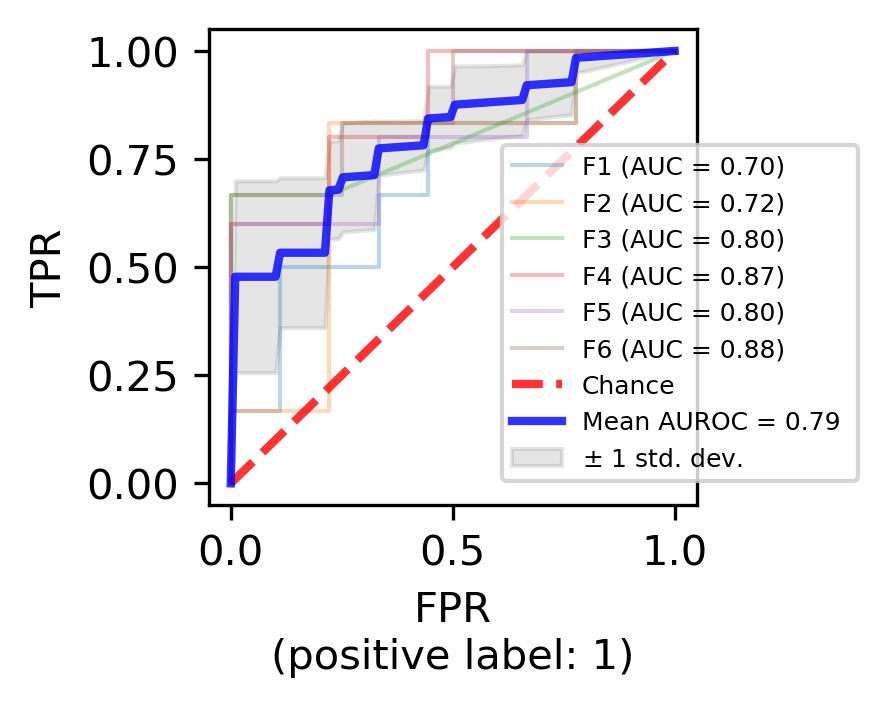

In [120]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=rs)

# indices for CV iterations
sid_ser = labels.copy().drop_duplicates()
sid_ser.index = sid_ser['SubjectID']
sid_ser = sid_ser['label']
dummy_size = np.arange(sid_ser.values.size)

# storing the model's scores
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# CV loop
fig, ax = plt.subplots()
for i, (train_iloc, test_iloc) in enumerate(cv.split(dummy_size,sid_ser.values, sid_ser.values)):
    
    train_id = sid_ser.index[train_iloc].copy().sort_values()
    test_id = sid_ser.index[test_iloc].copy().sort_values()

    y_train = sid_ser[train_id].copy()
    X_train = data_raw.loc[data_raw.index.get_level_values("SubjectID").isin(y_train.index)].copy().sort_index(0)
    
    y_test = sid_ser[test_id].copy()
    X_test = data_raw.loc[data_raw.index.get_level_values("SubjectID").isin(y_test.index)].copy().sort_index(0)
    
    trained_model = patch.fit(X_train, y_train.copy())
    viz = plot_roc_curve(trained_model, X_test, y_test.copy(),
                     name='F{}'.format(i+1),
                     alpha=0.3, lw=1, ax=ax)
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0

    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean AUROC = %0.2f " % (mean_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
ax.legend(loc=[.6, 0.05], fontsize = 6 )
ax.set_ylabel("TPR")
ax.set_xlabel("FPR\n(positive label: 1)")
fig.set_size_inches([2.1,2.1])
fig.set_dpi(300)
plt.show()

    
    
    
